# Cyber Security Salaries Analysis

In the ever-evolving landscape of the cyber security industry, understanding the variables that impact employee salaries is crucial for organizations to maintain competitiveness and for individuals to make informed career decisions. This data analysis project aims to dissect the multifaceted relationship between factors such as experience level, employment type, job title, remote work ratio, and employee residence, and their collective influence on salary outcomes.

Utilizing a rich dataset that spans various roles within the cybersecurity domain—ranging from Information Security Officers to Application Security Engineers—we embark on a quantitative journey to unravel patterns and insights. Our preliminary visualizations hint at complex dynamics, such as the intriguing salary discrepancies among different employment types, particularly when dissecting the remote work ratio.

The outcome of this project aims to be a cornerstone for both employers to structure equitable and competitive compensation packages and for employees to understand the market value of their skills and experience. Through this analytical lens, we aspire to contribute to a more transparent and informed tech community.

## 1.0 Intialization and Overview

### 1.1 Initialization

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# inline visualizations
%matplotlib inline

# Set style
plt.style.use('ggplot')

### 1.2 Overview

In [2]:
# import data and create dataframe
df = pd.read_csv('salaries.csv')

In [4]:
# Get an overview of data frame
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Information Security Officer,160000,USD,160000,US,100,US,M
1,2023,EX,FT,Information Security Officer,100000,USD,100000,US,100,US,M
2,2023,SE,FT,Security Engineer,247250,USD,247250,US,0,US,M
3,2023,SE,FT,Security Engineer,160000,USD,160000,US,0,US,M
4,2023,SE,FT,Security Engineer,224250,USD,224250,US,0,US,M
5,2023,SE,FT,Security Engineer,116000,USD,116000,US,0,US,M
6,2023,SE,FT,Security Architect,146000,USD,146000,US,100,US,M
7,2023,SE,FT,Security Architect,78900,USD,78900,US,100,US,M
8,2023,SE,FT,Security Engineer,384348,USD,384348,US,0,US,M
9,2023,SE,FT,Security Engineer,255652,USD,255652,US,0,US,M


In [6]:
# Get basic information and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4501 non-null   int64 
 1   experience_level    4501 non-null   object
 2   employment_type     4501 non-null   object
 3   job_title           4501 non-null   object
 4   salary              4501 non-null   int64 
 5   salary_currency     4501 non-null   object
 6   salary_in_usd       4501 non-null   int64 
 7   employee_residence  4501 non-null   object
 8   remote_ratio        4501 non-null   int64 
 9   company_location    4501 non-null   object
 10  company_size        4501 non-null   object
dtypes: int64(4), object(7)
memory usage: 386.9+ KB


The dataset demonstrates a high level of data integrity, with each column correctly formatted and populated with relevant values. This ensures that the data is primed for analysis without the need for extensive cleaning or preprocessing, thereby facilitating a streamlined and efficient analytical process.

### 1.3 Initial Exploration

In [10]:
# Returns all of the years used in this data
df['work_year'].unique()

array([2023, 2022, 2021, 2020], dtype=int64)

In [25]:
# Returns the the most common types of currencies
df['salary_currency'].value_counts().head(5)

salary_currency
USD    3998
EUR     198
GBP     155
CAD      59
AUD      19
Name: count, dtype: int64

In [12]:
# Returns the locations of the companies in this data
df['company_location'].unique()

array(['US', 'VN', 'SI', 'AU', 'CA', 'IN', 'GB', 'LV', 'NL', 'AT', 'IT',
       'DE', 'FI', 'ZA', 'MT', 'SG', 'EE', 'ES', 'FR', 'PL', 'JP', 'CZ',
       'SE', 'MY', 'PH', 'PT', 'IE', 'GR', 'CH', 'DK', 'NG', 'HR', 'HU',
       'AE', 'PY', 'CY', 'BR', 'BW', 'CL', 'RO', 'AQ', 'AX', 'MX', 'IL',
       'PK', 'NO', 'RU', 'ID', 'KE', 'RS', 'AR', 'NZ', 'BE', 'UM', 'LU',
       'SA', 'AF', 'TR'], dtype=object)

In [23]:
# Returns the top five locations
df['company_location'].value_counts().head(5)

company_location
US    3847
GB     177
CA     125
DE      49
AU      46
Name: count, dtype: int64

In [13]:
# Returns the ratios of remote employees in each role
df['remote_ratio'].unique()

array([100,   0,  50], dtype=int64)

In [17]:
# Returns the counts of each ratio of remote employees
df['remote_ratio'].value_counts()

remote_ratio
0      2312
100    1879
50      310
Name: count, dtype: int64

In [18]:
# Returns the counts of each employment type, 'FT' = Full Time, 'PT' = Part Time, 'CT' = Contract
# 'FL' = Freelance
df['employment_type'].value_counts()

employment_type
FT    4470
PT      15
CT      12
FL       4
Name: count, dtype: int64

In [24]:
# Returns all of the job titles in our dataset
df['job_title'].value_counts().head(10)

job_title
Security Engineer               1761
Security Analyst                 273
DevSecOps Engineer               237
Cyber Security Analyst           165
Security Architect               118
Penetration Tester               115
Security Researcher              103
Information Security Analyst      87
Compliance Analyst                80
Information Security Officer      79
Name: count, dtype: int64

This preliminary analysis reveals that our dataset encompasses a diverse array of cybersecurity professionals, spanning the period from 2020 to 2023. Predominantly, these professionals are engaged in full-time, on-site employment, with a significant concentration in the United States.


## 2.0 Exploratory Data Analysis

### 2.1 Salaries By Company Size

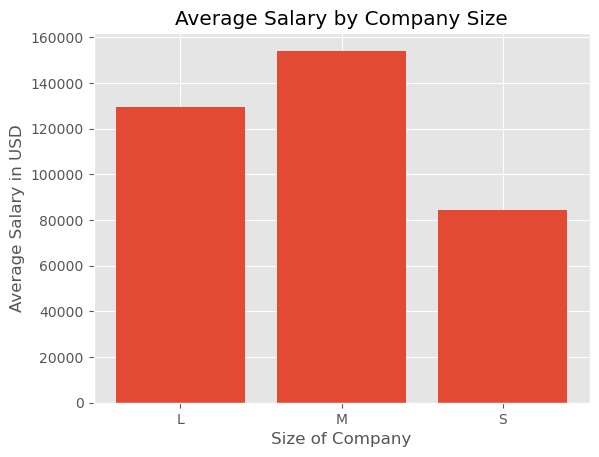

In [40]:
# Group the data by 'company_size' and calculate the mean salary for each group
avg_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.bar(avg_salary_by_company_size.index, avg_salary_by_company_size.values)

# Set the labels and title
ax.set_xlabel('Size of Company')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Company Size')

# Show the plot
plt.show()

The bar chart displays the average salary by company size, categorized into small (S), medium (M), and large (L). From the chart, we observe that medium-sized companies offer the highest average salary, followed by large and then small companies.

Several factors could contribute to this finding:

1. Specialization and Skills: Medium-sized companies may be in a growth phase requiring specialized skills that are in high demand, thus offering higher salaries to attract the necessary talent.

2. Flexibility in Budget: Unlike small companies, medium-sized firms might have more financial flexibility to offer competitive salaries, but unlike large companies, they might not have the same scale to reduce average salary costs.

3. Competitive Positioning: Medium-sized companies may be trying to position themselves as attractive alternatives to large corporations by offering higher salaries to draw top talent away from those larger entities.

4. Compensation Strategy: A deliberate strategy might be in play where medium-sized companies offer higher salaries to compensate for other factors, like lesser-known brand names, perceived job security, or benefits that may not be as comprehensive as those offered by larger organizations.

5. Niche Markets: Sometimes, medium-sized companies operate in niche markets where the expertise required is scarce, leading to higher pay for qualified professionals.

6. Organizational Structure: Medium-sized companies may have leaner structures with more roles having strategic importance, which could command higher salaries compared to larger companies where the same roles might be more operational and less directly tied to strategic outcomes.

### 2.2 Salaries By Years

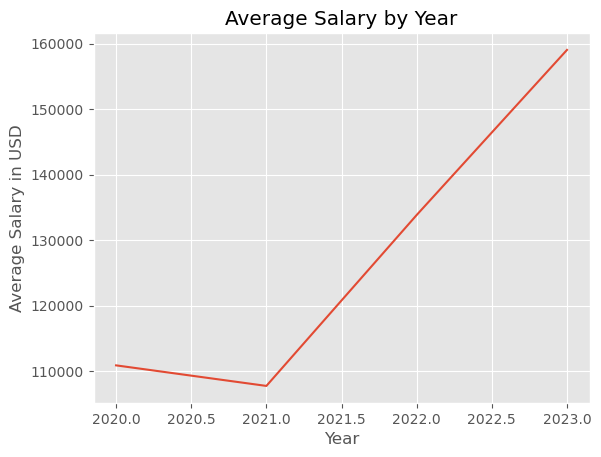

In [46]:
# Group the data by 'work_year' and calculate the mean salary for each group
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.plot(avg_salary_by_year.index, avg_salary_by_year.values)

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Year')

# Show the plot
plt.show()

The chart, titled "Average Salary by Year," shows a clear upward trend in average salaries from 2020 to 2023. Several factors could explain this increase in salaries during the time frame:

1. Inflation: As the cost of living increases over time due to inflation, salaries often rise correspondingly to maintain purchasing power.

2. Market Demand: The field of cybersecurity is rapidly evolving, with increasing demand for skilled professionals. This demand can drive up salaries as companies compete for talent.

3. Technological Advancements: New technologies and threats can create a need for more specialized skills, which are typically compensated with higher pay.

4. Economic Recovery: If the period from 2020 was marked by economic challenges, such as those brought by the COVID-19 pandemic, the subsequent years might reflect a recovery phase with increased budgets for salaries.

5. Increased Awareness of Cyber Threats: With cyber threats becoming more prevalent and severe, the value placed on cybersecurity professionals' work might increase, leading to higher salaries.

6. Legislative and Regulatory Changes: New regulations requiring robust cybersecurity measures can increase the need for professionals in the field, pushing salaries higher.

7. Global Talent Shortage: A global shortage of cybersecurity experts can lead to increased salaries as companies try to attract scarce talent.

8. Remote Work Trends: The shift towards remote work may have expanded the talent pool geographically, allowing professionals to command higher salaries due to a broader range of opportunities.

The exact reasons for the salary increase could be multifaceted and would benefit from a deeper analysis that includes macroeconomic indicators, industry trends, and changes in the job market specific to cybersecurity.

### 2.3 Salaries By Employment Type

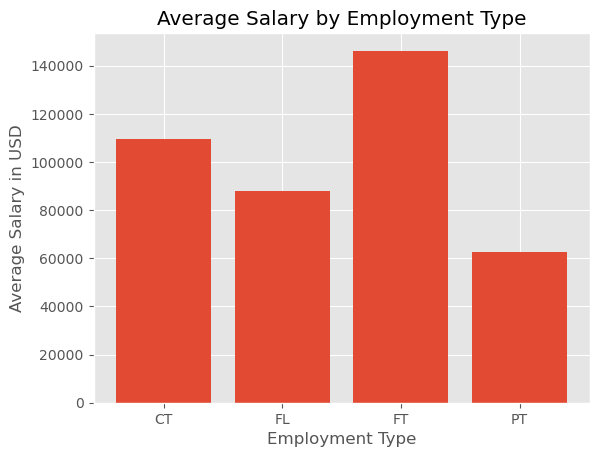

In [47]:
# Group the data by 'employment_type' and calculate the mean salary for each group
avg_salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.bar(avg_salary_by_employment_type.index, avg_salary_by_employment_type.values)

# Set the labels and title
ax.set_xlabel('Employment Type')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Employment Type')

# Show the plot
plt.show()

The bar chart titled "Average Salary by Employment Type" compares the average salaries of different employment types: contract (CT), full-time (FT), and part-time (PT). It indicates that full-time employment has the highest average salary, followed by contract, with part-time employment having the lowest average salary.

This pattern is generally expected for several reasons:

1. Benefits and Stability: Full-time employment often comes with a host of benefits, such as health insurance, retirement plans, and paid leave, which contribute to the total compensation package. Moreover, full-time jobs tend to offer more stability and job security, which are typically associated with higher pay.

2. Annual Salaries vs. Hourly Wages: Full-time and part-time positions may differ in how they are compensated. Full-time roles are usually salaried positions, which can lead to higher total annual compensation compared to part-time roles, which are often hourly and may not offer the same level of income due to fewer hours worked.

3. Skill Level and Job Role: Full-time positions may require a higher skill level or more specialized knowledge, leading to higher compensation. Part-time positions may be more entry-level or less specialized.

4. Contract Work Variability: Contract work can sometimes offer higher hourly rates than full-time employment, but contractors may not have consistent work and do not typically receive the benefits that full-time employees do, which can affect their average annual income.

5. Work Commitment: Employers may be willing to pay more for employees who can commit to a full-time schedule, as this can ensure consistency and reliability in the workforce.

6. Negotiation and Advancement: Full-time employees often have more room for salary negotiation and opportunities for advancement, both of which can lead to higher average salaries.

It is important to note that while full-time roles show the highest average salary in the dataset, the actual salaries can vary widely based on the industry, region, specific job role, and the individual’s level of experience and education.

### 2.4 Salaries By Experience Level

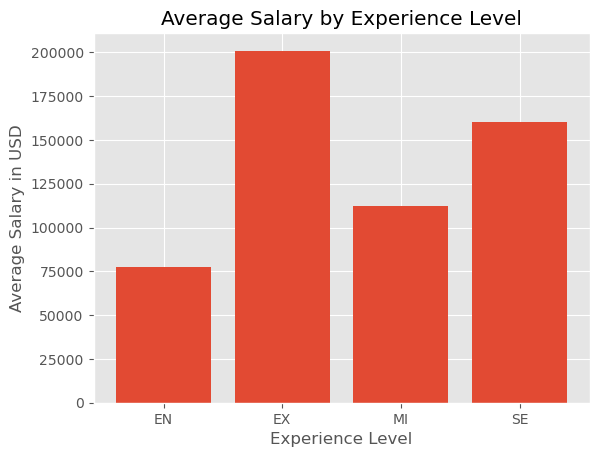

In [53]:
# Group the data by 'experience_level' and calculate the mean salary for each group
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.bar(avg_salary_by_experience.index, avg_salary_by_experience.values)

# Set the labels and title
ax.set_xlabel('Experience Level')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Experience Level')

# Show the plot
plt.show()

The bar chart titled "Average Salary by Employment Type," appears to show average salaries for three categories of employment experience: Entry-level (EN), Mid-level (MI), Expert (EX), and Senior-level (SE). The chart indicates that senior-level employees have the highest average salary, followed by mid-level employees, with entry-level employees having the lowest average salary.

This pattern is generally expected for several reasons:

1. Experience and Skill Accumulation: Senior-level employees typically have a greater accumulation of skills and experience, which often leads to higher salaries. As employees progress in their careers, they tend to take on more complex tasks and greater responsibilities that warrant higher pay.

2. Market Value and Negotiation Power: With experience comes a better understanding of the market value of one's skills and often greater negotiation power regarding salary. Senior-level employees may also have a proven track record that they can leverage in salary discussions.

3. Professional Network and Reputation: Over time, individuals build a professional network and reputation that can lead to better job opportunities and higher salary offers. Senior professionals often have an extensive network they can tap into for new opportunities that pay well.

4. Role and Impact: Senior roles are typically more strategic with a wider scope of influence within an organization, which can justify higher compensation due to the larger impact on the company’s success.

### 2.5 Salaries by Remote Ratio

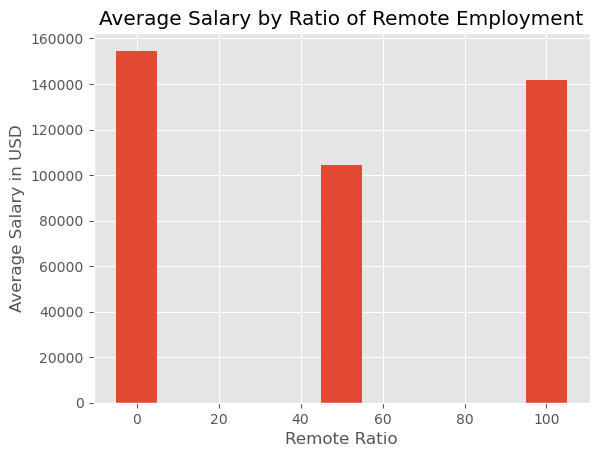

In [3]:
# Group the data by 'remote_ratio' and calculate the mean salary for each group
avg_salary_by_rr = df.groupby('remote_ratio')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.bar(avg_salary_by_rr.index, avg_salary_by_rr.values, width=10)

# Set the labels and title
ax.set_xlabel('Remote Ratio')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Ratio of Remote Employment')

# Show the plot
plt.show()

The "Average Salary by Employment Type" bar chart displays average salaries by employment type, categorized by remote ratio. The categories seem to include fully remote, fully on-site, and a mix of both. The bar representing companies with a mixture of remote and on-site employees shows the lowest average salary.

Several factors could contribute to this observed difference in average salary:

1. Job Roles and Industry: Companies that offer a mix of remote and on-site work might be in industries or have roles that traditionally pay less. For example, they might have a larger number of entry-level or support positions which tend to have lower salaries.

2. Cost of Living Adjustments: Companies that have mixed remote policies might adjust salaries based on the cost of living where the employee resides. If many employees live in areas with a lower cost of living, the average salary across the company might be lower.

3. Company Size and Resources: Smaller companies or startups often have a mix of remote and on-site workers due to space limitations and may not have the resources to pay as high salaries as larger, more established companies.

4. Flexibility Trade-Off: Some employees might be willing to accept a lower salary in exchange for the flexibility of being able to work both remotely and on-site.

5. Operational Costs: Companies with mixed employment types might have higher operational costs due to maintaining both office space and remote capabilities, potentially leaving less budget available for salaries.

# Conclusion

This comprehensive analysis of cybersecurity salaries has revealed critical insights into the factors influencing compensation across the industry. From examining the impact of employment type to the role of company size, this data-driven approach has illuminated the multifaceted nature of salary determinants.

I discovered that full-time employees enjoy the highest average salaries, emphasizing the value placed on long-term commitment and the comprehensive benefits that these positions typically offer. Meanwhile, contract work, despite its flexibility, tends to offer less financial security, as evidenced by its lower average compensation.

Further, this study highlighted the premium placed on medium-sized companies, which often provide competitive salaries to attract and retain top talent. These companies balance the agility of smaller entities with the resources of larger organizations, creating a sweet spot for cybersecurity professionals seeking advancement without the bureaucracy of large-scale operations.

This analysis also noted the importance of job roles, with positions demanding specialized skills or higher risk responsibilities commanding greater pay. Remote work ratios also significantly influenced salaries, indicating a complex relationship between work flexibility and compensation.

As the cybersecurity landscape evolves, this analysis should serve as a beacon for both employers structuring equitable compensation packages and professionals navigating their career trajectories. With an eye toward future trends and emerging roles, we anticipate that the insights gleaned here will remain relevant, empowering stakeholders to make informed decisions in this dynamic field.

In conclusion, this project has provided a valuable lens through which we can view the current state of cybersecurity compensation. It lays the groundwork for ongoing research and offers a benchmark for the industry as it continues to grow and adapt to new challenges and technologies.